In [1]:
import time, sys, joblib

import pandas as pd

sys.path.append('/home/yilingh/SI-Interaction')
from selectinf.Simulation.plotting_helpers import *
from selectinf.Simulation.H1.nonlinear_H1_helpers import *

In [2]:
##%%
def filter_pval_dict(pval_dict, target_dict, threshold=0.05):
    target_dict_df = pd.DataFrame(target_dict)
    filtered_dict = {}
    for par in pval_dict.keys():
        filtered_dict[par] = {}
        par_dict = pval_dict[par]
        target_df_par = target_dict_df[target_dict_df['parameter'] == par]
        
        for method in par_dict.keys():
            targets_p_m = (target_df_par[target_df_par['method'] == method])['target']
            selected_targets = (np.abs(targets_p_m) < threshold)
            pvals_p_m = np.array(pval_dict[par][method])
            filtered_dict[par][method] = pvals_p_m[selected_targets].tolist()
    
    return filtered_dict

# Vary SNR with Strong Hierarchy

In [3]:
dir_list = ['results0_16.pkl', 'results16_32.pkl', 'results32_48.pkl', 'results48_64.pkl']

In [13]:
opers = []
pvals = []
targets = []
for path in dir_list:
    result = joblib.load(path)
    list_of_oper = [tup[0] for tup in result]
    list_of_pval = [tup[1] for tup in result]
    list_of_targets = [tup[2] for tup in result]
    opers.append(combine_lists(list_of_oper))
    pvals.append(combine_nested_lists(list_of_pval))
    targets.append(combine_lists(list_of_targets))

In [8]:
oper_char = combine_lists(opers)

In [14]:
pvals_all = combine_nested_lists(pvals)

In [16]:
targets_all = combine_lists(targets)

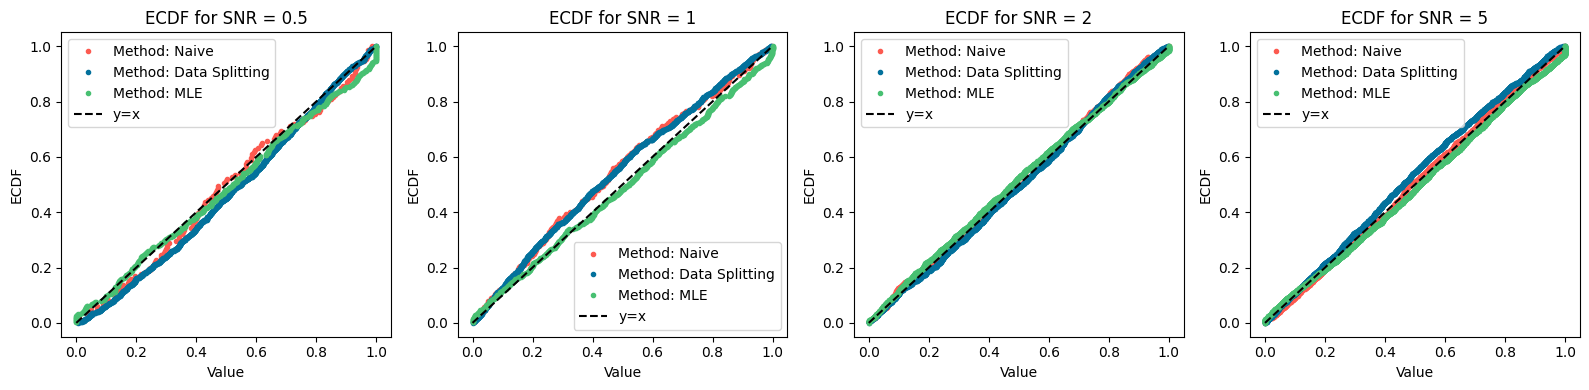

In [19]:
plot_ecdfs(pvals_all, xaxis="SNR")

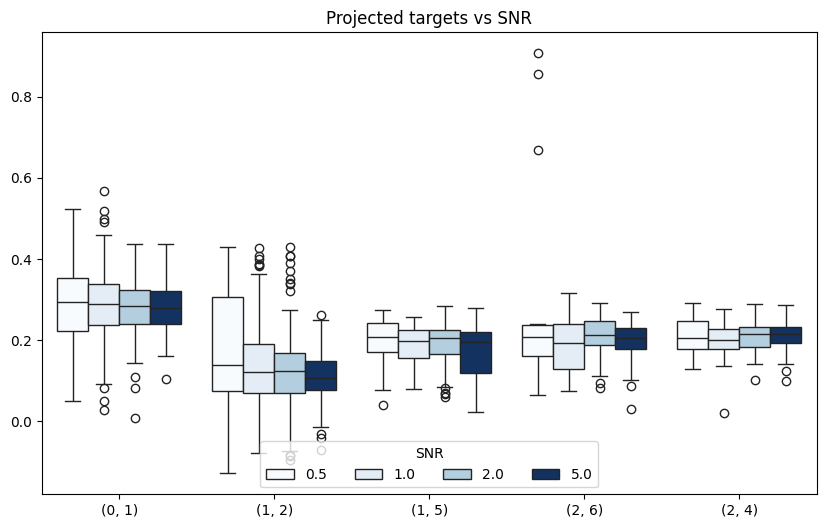

In [20]:
plot_multi_targets(targets_all, xaxis="SNR")

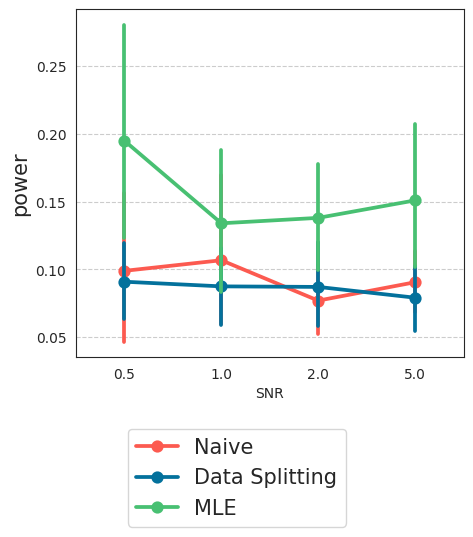

In [21]:
point_plot_multimetrics(oper_char_df=pd.DataFrame(oper_char),
                        x_axis="SNR",
                        hue="method",
                        metric_list=["power"])

# Vary SNR with Weak Hierarchy

In [3]:
dir_list_wh = ['results0_40_wh.pkl', 'results40_80_wh.pkl', 'results80_120_wh.pkl', 'results120_160_wh.pkl']

In [4]:
opers = []
pvals = []
targets = []
for path in dir_list_wh:
    result = joblib.load(path)
    list_of_oper = [tup[0] for tup in result]
    list_of_pval = [tup[1] for tup in result]
    list_of_targets = [tup[2] for tup in result]
    opers.append(combine_lists(list_of_oper))
    pvals.append(combine_nested_lists(list_of_pval))
    targets.append(combine_lists(list_of_targets))

In [5]:
oper_char = combine_lists(opers)

In [6]:
pvals_all = combine_nested_lists(pvals)

In [7]:
targets_all = combine_lists(targets)

In [17]:
## Plotting dict: SNR - Method - List of pvals
filtered_dict = filter_pval_dict(pvals_all, targets_all, threshold = 10)

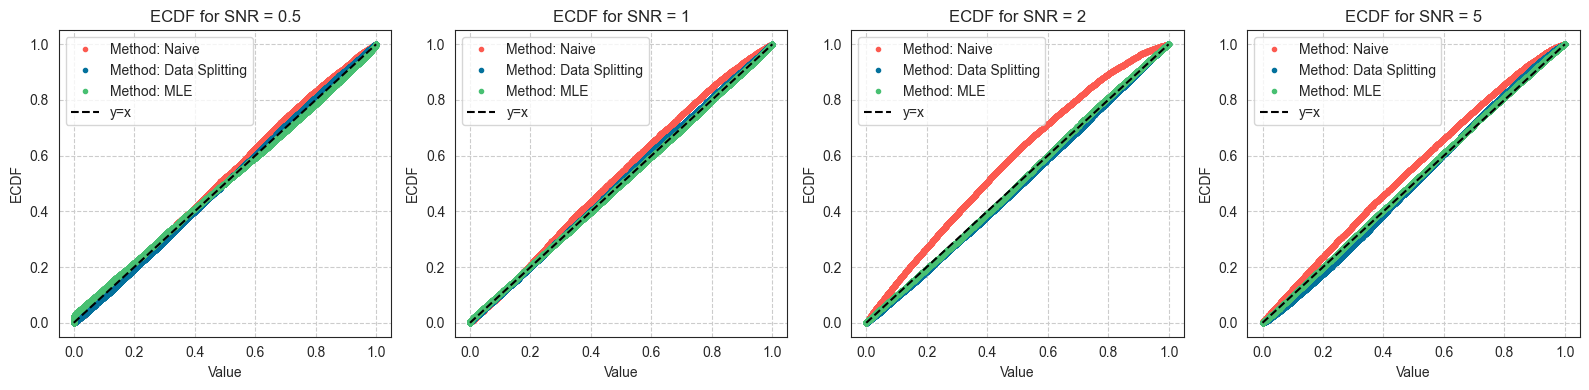

In [18]:
plot_ecdfs(filtered_dict, xaxis="SNR")

In [13]:
## Plotting dict: SNR - Method - List of pvals
filtered_dict = filter_pval_dict(pvals_all, targets_all, threshold = 0.5)

In [21]:
pd.DataFrame(targets_all)

,parameter,target,target id,method
0,0.5,0.265930,"(0, 1)",Naive
1,0.5,0.401829,"(0, 2)",Naive
2,0.5,0.306903,"(0, 3)",Naive
3,0.5,0.377620,"(0, 4)",Naive
4,0.5,0.395033,"(0, 5)",Naive
...,...,...,...,...
177931,5.0,0.013803,"(16, 17)",MLE
177932,5.0,0.008771,"(16, 19)",MLE
177933,5.0,-0.012773,"(17, 18)",MLE
177934,5.0,-0.004108,"(17, 19)",MLE


In [24]:
# List and array representations of true interaction indices
active_inter_list_true = np.array([[0, 1], [1, 2], [2, 4], [1, 5], [2, 6]])
active_inter_list_true_list = [(x[0], x[1]) for x in active_inter_list_true]

In [32]:
import ast
def filter_targets(targets_dict, true_inter_list):
    targets = targets_dict['target id']
    true_flag = [ast.literal_eval(t) in true_inter_list for t in targets]
    filtered_dict = {}
    for k in targets_dict.keys():
        filtered_dict[k] = np.array(targets_dict[k])[true_flag].tolist()
        
    return filtered_dict
        

In [33]:
filtered_targets = filter_targets(targets_all, active_inter_list_true_list)

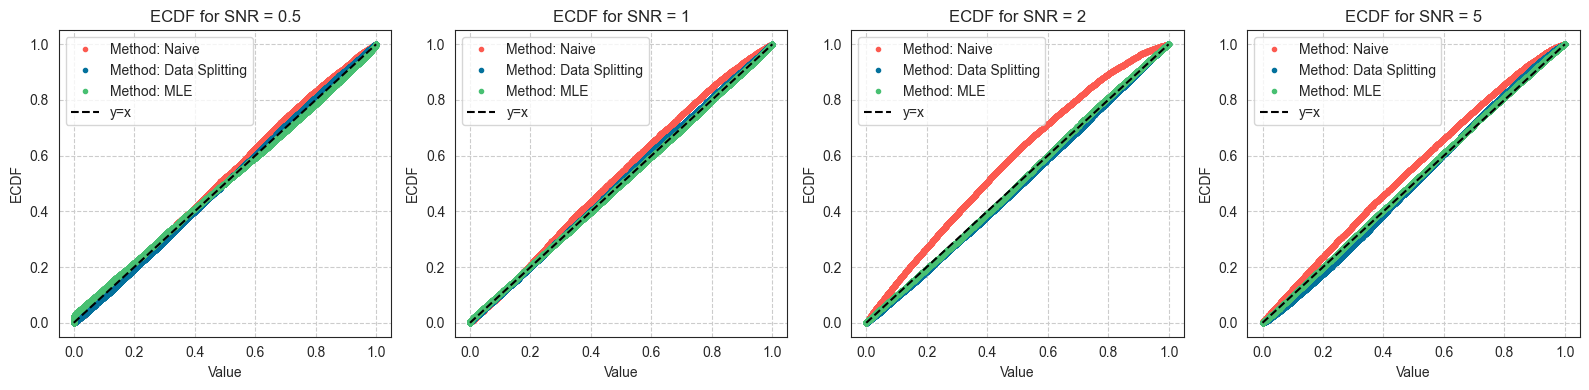

In [34]:
plot_ecdfs(filtered_dict, xaxis="SNR")

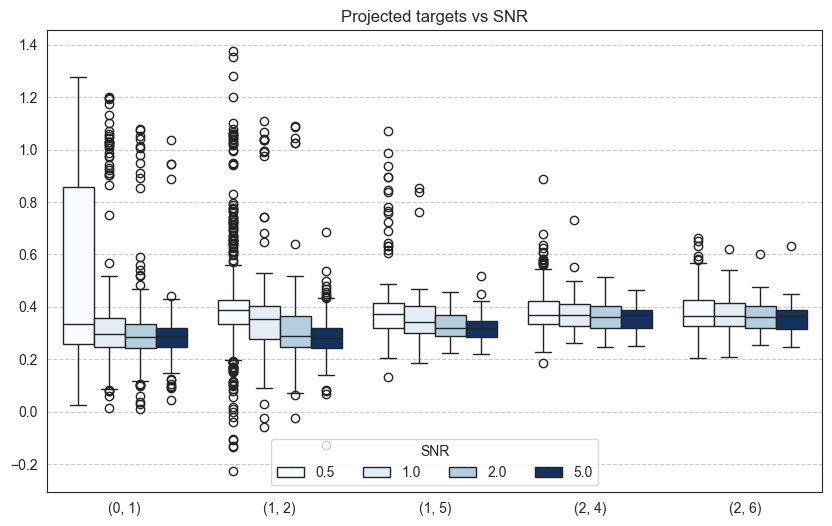

In [35]:
plot_multi_targets(filtered_targets, xaxis="SNR")

{'parameter': [], 'target': [], 'target id': [], 'method': []}

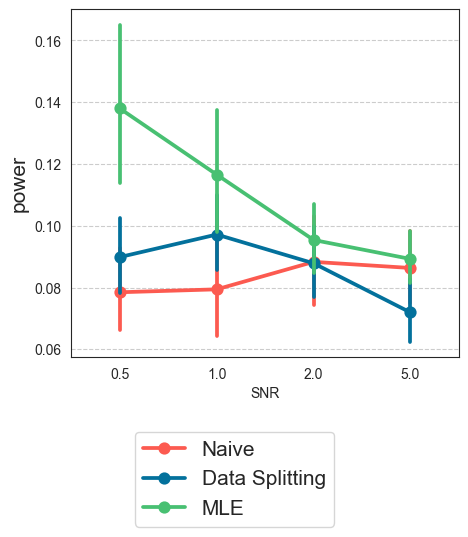

In [19]:
point_plot_multimetrics(oper_char_df=pd.DataFrame(oper_char),
                        x_axis="SNR",
                        hue="method",
                        metric_list=["power"])

In [14]:
targets_df = pd.DataFrame(targets_all)

In [17]:
targets_df

,parameter,target,target id,method
0,0.5,0.265930,"(0, 1)",Naive
1,0.5,0.401829,"(1, 2)",Naive
2,0.5,0.306903,"(1, 5)",Naive
3,0.5,0.293424,"(0, 1)",Data Splitting
4,0.5,0.377645,"(1, 2)",Data Splitting
...,...,...,...,...
3607,5.0,0.179672,"(0, 1)",MLE
3608,5.0,0.040280,"(1, 2)",MLE
3609,5.0,0.150630,"(1, 5)",MLE
3610,5.0,0.196017,"(2, 4)",MLE


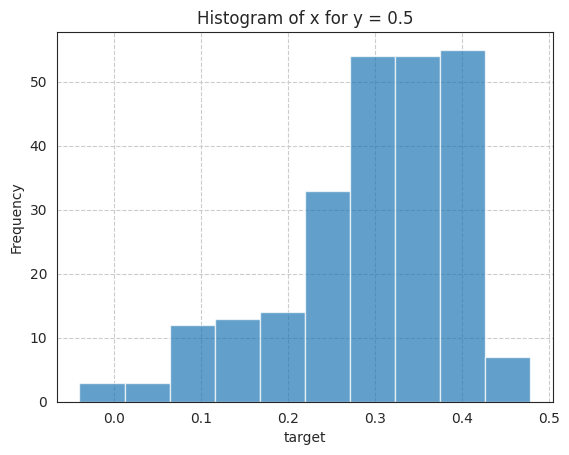

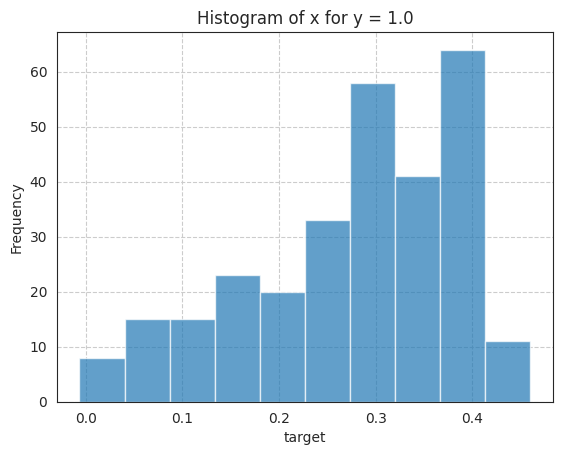

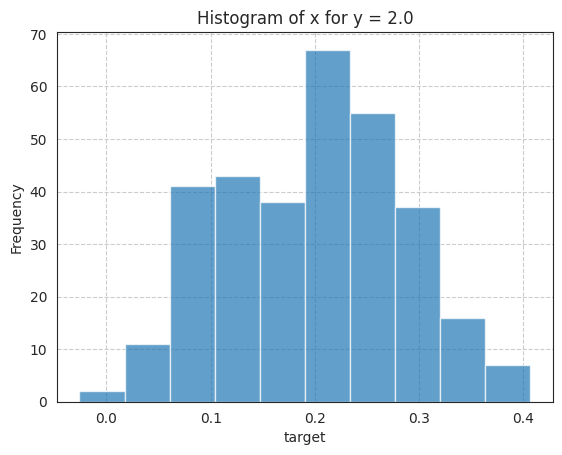

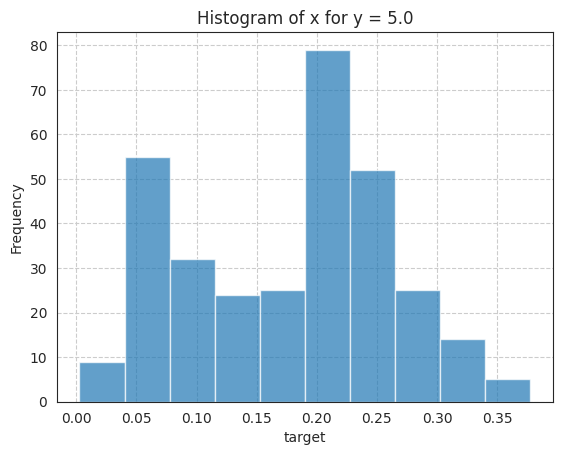

In [19]:
targets_df_naive = targets_df[targets_df['method']=='Naive']
# Grouping by 'y' and plotting histograms
grouped_targets = targets_df_naive.groupby('parameter')

for name, group in grouped_targets:
    plt.figure()
    plt.hist(group['target'], bins=10, alpha=0.7)
    plt.xlabel('target')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of x for y = {name}')
    plt.show()